In [1]:
import numpy as np # Numpy numerical computing library
import pandas as pd # Pandas data science library
import requests # requests library for HTTP requests in Python
import datetime # datetime provides date information 
import matplotlib.pyplot as plt # pyplot plot data
import random # Generate random number
import math # Math provide access to equations

In [2]:
symbol = "AMZN"

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}&outputsize=full&apikey=NMDP5PAY7P2NCZJO'
r = requests.get(url)
data = r.json()

daily = data['Time Series (Daily)']
daily

{'2022-11-07': {'1. open': '91.95',
  '2. high': '92.1',
  '3. low': '89.04',
  '4. close': '90.53',
  '5. adjusted close': '90.53',
  '6. volume': '77330201',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0'},
 '2022-11-04': {'1. open': '91.49',
  '2. high': '92.44',
  '3. low': '88.04',
  '4. close': '90.98',
  '5. adjusted close': '90.98',
  '6. volume': '129101336',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0'},
 '2022-11-03': {'1. open': '92.47',
  '2. high': '93.5',
  '3. low': '89.02',
  '4. close': '89.3',
  '5. adjusted close': '89.3',
  '6. volume': '136683303',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0'},
 '2022-11-02': {'1. open': '97.315',
  '2. high': '97.74',
  '3. low': '92.01',
  '4. close': '92.12',
  '5. adjusted close': '92.12',
  '6. volume': '135761798',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0'},
 '2022-11-01': {'1. open': '103.99',
  '2. high': '104.58',
  '3. low': '96.06',
  '

In [3]:
time_key = datetime.date.today()
time_count = 0
time_len = 1000

env = []

while time_count < time_len:
    try:
        day_close = daily[time_key.strftime("%Y-%m-%d")]['5. adjusted close']
        env.append(float(day_close))
        time_count += 1
    except:
        pass
    time_key = time_key - datetime.timedelta(days=1)


env.reverse()
# aapl_env

<function matplotlib.pyplot.show(close=None, block=None)>

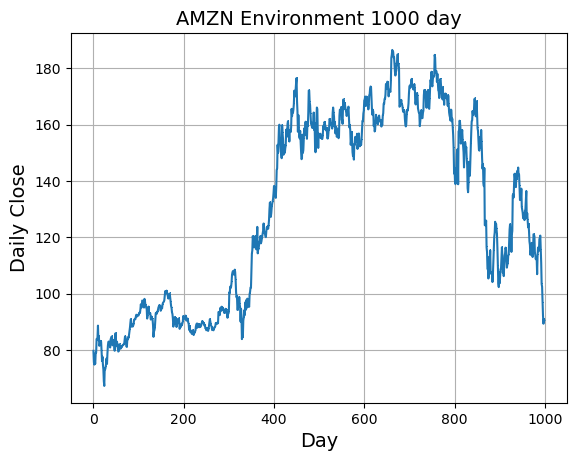

In [4]:
plt.plot(env, marker=",")
plt.title(f'{symbol} Environment {time_len} day', fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Daily Close', fontsize=14)
plt.grid(True)
plt.show

In [5]:
def bot_random(env, cash):
    
    time_len = len(env)
    my_money = cash
    my_volume = 0
    report = []
    
    for t in range(time_len):      
        
        # Sell all on last day
        if t == time_len - 1:
            my_money += my_volume * env[t]
            my_volume -= my_volume
            report.append([t, env[t], 2, round(my_money, 2), my_volume]) 
            break
        
        action = random.randrange(3)
        
        if action == 0:
            continue
        
        elif action == 1 and my_money > env[t]:
            cur_volume = math.floor(my_money / 3 / env[t])
            my_volume += cur_volume
            my_money -= cur_volume * env[t]
            report.append([t, env[t], action, round(my_money, 2), my_volume])
        
        elif action == 2 and my_volume > 0:
            my_money += my_volume * env[t]
            my_volume -= my_volume
            report.append([t, env[t], action, round(my_money, 2), my_volume])    
            
    return report, my_money

In [6]:
cash = 1000000
test = 10000
count = 0
avg = 0

for i in range(test):
    report,result = bot_random(env, cash)
    if result > cash: 
        count += 1
    avg += result

passive_momentum = round((env[-1] - env[0]) / env[0] * 100, 2)
positive_rate = round(count/test*100, 2)
avg = round(avg / test, 2)
avg_momentum = round((avg - cash) / cash * 100, 2)

report_0 = f"Environment passive momentum: {passive_momentum}%"
report_1 = f"Bot's positive result rate: {positive_rate}%"
report_2 = f"Bot's avg momentum: {avg_momentum}%"

print(report_0)   
print(report_1)
print(report_2)

Environment passive momentum: 13.63%
Bot's positive result rate: 61.93%
Bot's avg momentum: 8.57%


Test conclusion - bot_random:

* Tested on time length of 500 & 1000
* Both achieved positive average momentum
* Show suprisingly high robust against stock market crash